# Gaussian Plume Models

The gaussian plume model assumes that concentration profile in the crosswind (y) and vertical (z) directions follow gaussian distributions with dispersions $\sigma_y$ and $\sigma_z$, respectively. This model can be derived from an advection-diffusion equation, or simply taken as a given.

The basic gaussian would have the plume expand downward beyond the ground, to correct for this an additional term for *ground reflection* is added. This is equivalent to adding a mirror image source reflected across the x-z plane, and causes mass to accumulate along the ground instead of simply disappearing (as would happen in the naive case).

The concentration is then given by:

$$ c_{plume} = {Q_i \over 2 \pi u \sigma_{y} \sigma_{z} }
\exp \left[ -\frac{1}{2} \left( y \over \sigma_{y} \right)^2 \right] \\
\times \left\{ \exp \left[ -\frac{1}{2} \left( { z -h } \over \sigma_{z} \right)^2 \right] + \exp \left[ -\frac{1}{2} \left( { z + h } \over \sigma_{z} \right)^2 \right] \right\} $$

with
- $c_{plume}$ - concentration, volume fraction
- $Q_i$ - volumetric emission rate of the species (m^3/s)
- *u* - windspeed (m/s)
-  $\sigma_y$  - crosswind dispersion (m)
-  $\sigma_z$  - vertical dispersion (m)
- *h* - release elevation (m)

Three important parameters are determined from correlations, which are functions of the atmospheric stability: the windspeed at the release point, the crosswind dispersion, and the vertical dispersion.

## Windspeed correlations

The windspeed, $u$, at the release height, $h$, is given by

$$ u = u_{R} \left( h \over h_{R} \right)^{\alpha} $$

Where $u_{R}$ is the windspeed set for the `Atmosphere` and $h_{R}$ is the reference height for that windspeed. The parameter $\alpha$ is tabulated based on stability class:

| Stability Class | $\alpha$ |
|:---------------:|:--------:|
|        A        |  0.108   |
|        B        |  0.112   |
|        C        |  0.120   |
|        D        |  0.142   |
|        E        |  0.203   |
|        F        |  0.253   |


## Crosswind dispersion correlations

The crosswind dispersion, $\sigma_{y}$ is a function of downwind distance, $x$ as well as stability class

$$ \sigma_{y} = \delta x^{\beta} $$

Where $\delta$, $\beta$, and $\gamma$ are tabulated based on stability class:

| Stability Class | $\delta$ | $\beta$ |
|:---------------:|:--------:|:-------:|
|        A        |  0.423   |   0.9   |
|        B        |  0.313   |   0.9   |
|        C        |  0.210   |   0.9   |
|        D        |  0.136   |   0.9   |
|        E        |  0.102   |   0.9   |
|        F        |  0.0674  |   0.9   |

Spicer, T. O. and J. A. Havens, "Development of Vapor Dispersion Models for Non-Neutrally Buoyant Gas Mixtures--Analysis of TFI/NH3 Test Data" USAF Engineering and Services Laboratory, Final Report, 1988

## Vertical dispersion correlations

The vertical dispersion, $\sigma_{z}$ is a function of downwind distance, $x$ as well as stability class

$$ \sigma_{z} = \delta x^{\beta} \exp \left( \gamma \left( \ln x \right)^2 \right) $$

Where $\delta$ and $\beta$ are tabulated based on stability class:

| Stability Class | $\delta$ | $\beta$ | $\gamma$ |
|:---------------:|:--------:|:-------:|:--------:|
|        A        |  107.7   | -1.7172 |  0.2770  |
|        B        |  0.1355  |  0.8752 |  0.0136  |
|        C        |  0.09623 |  0.9477 | -0.0020  |
|        D        |  0.04134 |  1.1737 | -0.0316  |
|        E        |  0.02275 |  1.3010 | -0.0450  |
|        F        |  0.01122 |  1.4024 | -0.0540  |

Seinfeld, J. H. *Atmospheric Chemistry and Physics of Air Pollution*, John Wiley and Sons, New York, 1986


## Example

This scenario is adapted from CCPS *Guidelines for Consequence Analysis of
Chemical Releases*, CCPS, pg 47.

Suppose we wish to model the dispersion of gaseous propane from a leak from a storage tank, where the leak is from a 10 mm hole that is 3.5 m above the ground and the propane is at 25°C and 4barg. Assume the discharge coefficient $c_{D} = 0.85$

In [1]:
using GasDispersion

In [2]:
Patm = 101325 # Pa
P1 = 4e5 + Patm # Pa
T1 = 25 + 273.15 # K

propane = Substance(name = :propane,
                    gas_density = 9.7505, # Propane, NIST Webbook
                    liquid_density = 526.13, # Propane, NIST Webbook
                    reference_temp= T1,
                    reference_pressure= P1,
                    boiling_temp = 231.04, # Propane, NIST Webbook
                    latent_heat = 425740.0, # J/kg, 
                    gas_heat_capacity = 1678.0, # J/kg/K, 
                    liquid_heat_capacity = 2520.0) # J/kg/K

Substance: propane 


In [3]:
scn = scenario_builder(propane, JetSource; 
       phase = :gas,
       diameter = 0.01, # m
       dischargecoef = 0.85,
       k = 1.15,         # heat capacity ratio, from Crane's
       temperature = T1, # K
       pressure = P1,    # Pa
       height = 3.5)     # m, height of hole above the ground

Substance: propane 
Release conditions:
    ṁ: 0.09426204511744017 kg/s 
    Δt: Inf s 
    d: 0.01 m 
    u: 199.34706765725818 m/s 
    h: 3.5 m 
    P: 287952.6877282304 Pa 
    T: 277.3488372093023 K 
    f_l: 0.0  
Atmospheric conditions:
    P: 101325 Pa 
    T: 298.15 K 
    Rs: 287.0500676 J/kg/K 
    u: 1.5 m/s 
    h: 10 m 
    stability: ClassF  


A simple gaussian plume model is given by

In [4]:
c = plume(scn, GaussianPlume);

Where `c` is now a callable, we can calculate the concentration (in vol fraction) at any point, say at 100m down wind at a height of 2m:

In [5]:
c(100,0,2)

0.00014736570018180804

We also may want a plan-view of the plume, at a height of 2m (that's about where my head is when I'm standing up)

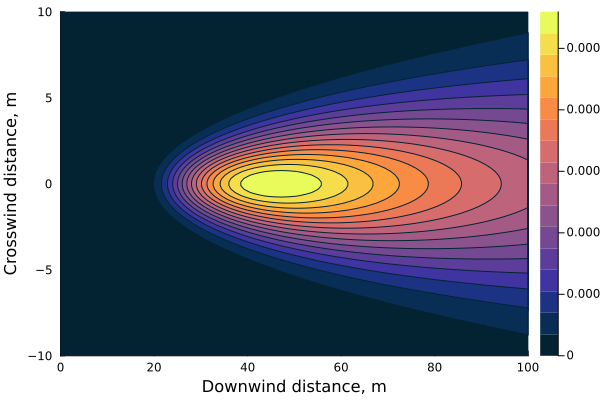

In [6]:
using Plots

plot(c, xlims=(0,100), ylims=(-10,10), height=2)

We might want instead to look at the concentration at the release height: 3.5 m, zoom in, and look at concentrations in the vicinity of the LEL.

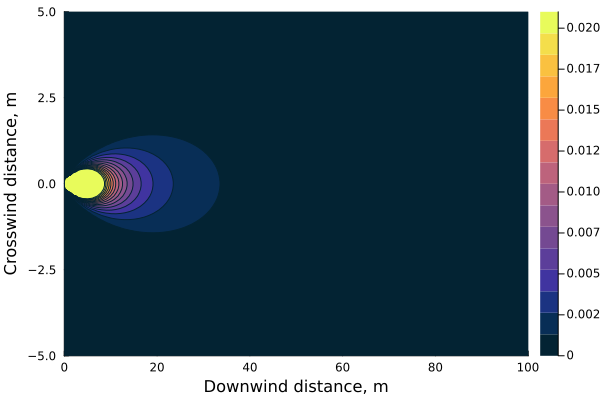

In [7]:
LEL = 0.021 # v/v, LEL from CAMEO Chemicals
UEL = 0.095 # v/v, UEL from CAMEO Chemicals

plot(c, xlims=(0,100), ylims=(-5,5), height=3.5, clims=(0,LEL))

These plan views stretch out the crosswind distance, but we can change the aspect ratio, to give a sense of how skinny the plume actually is

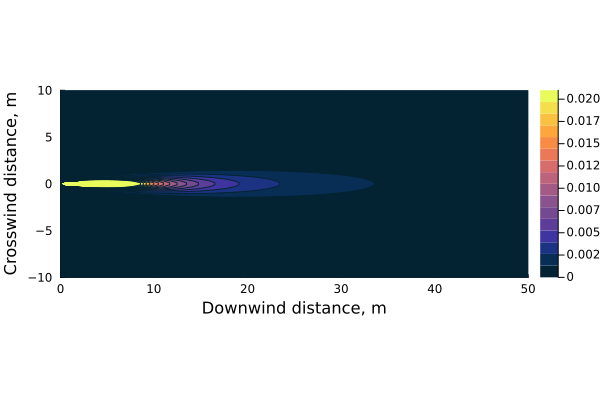

In [8]:
plot(c, xlims=(0,50), ylims=(-10,10), height=3.5, clims=(0,LEL),
     aspect_ratio=:equal)

# Stack Downwash

When the stack downwash argument is `true` the model will adjust the effective release height to compensate for downwash, assuming that the release is vertical.

In [9]:
c = plume(scn, GaussianPlume; downwash=true);

# Plume Rise

When the plumerise argument is `true` the model uses the Briggs model for plume rise to calculate the effective release height, assuming that the release is vertical.

In [10]:
c = plume(scn, GaussianPlume; plumerise=true);